In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys
sys.path.insert(0, '/Users/salene/Documents/GitHub/driving-behavior-classification-prediction/scripts')

# Monte Carlo Simulation with Predictive Modeling

In [3]:
!pip3 install xgboost

In [28]:
import monte_carlo_simulation as mcs
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [29]:
import numpy as np
data = pd.read_csv("/Users/salene/Documents/GitHub/driving-behavior-classification-prediction/datasets/driving-behavior/train_motion_data.csv")
test = pd.read_csv("/Users/salene/Documents/GitHub/driving-behavior-classification-prediction//datasets/driving-behavior/test_motion_data.csv")
#features = ["AccX", "AccY", "AccZ", "GyroX", "GyroY", 'GyroZ']
df = pd.read_csv('/Users/salene/Documents/GitHub/driving-behavior-classification-prediction/datasets/driving-behavior/train_motion_data.csv')
target_col = 'Class'
mcs_ = mcs.MonteCarloSimulation(df, target_col, n_splits=10)
mcs_.run_simulation()
acc, recall, f1, precision = mcs_.get_results()
print('Recalls:', recall)
print('Accuracies:', acc)
print('F1s:', f1)
print('Precisions:', precision)
print('Mean Recalls:', np.mean(recall))
print('Mean accuracy:', np.mean(acc))
print('Mean F1:', np.mean(f1))
print('Mean Precision:', np.mean(precision))
print('Standard deviation (Recall):', np.std(recall))
print('Standard deviation (Acc):', np.std(acc))
print('Standard deviation (F1):', np.std(f1))
print('Standard deviation (Precision):', np.std(precision))
mcs_.validate_best_model()

--------------------------------------------------
          Running at sample number -> 1           
        Models to train XGB, RFClassifier         
Recall score for sample #1     (XGB)   =        1.0
Precision score for sample #1  (XGB)   =        1.0
F1 score for sample #1         (XGB)   =        1.0
Accuracy score for sample #1   (XGB)   =        1.0
Recall score for sample #1     (RF)    =        1.0
Precision score for sample #1  (RF)    =        1.0
F1 score for sample #1         (RF)    =        1.0
Accuracy score for sample #1   (RF)    =        1.0
--------------------------------------------------
--------------------------------------------------
          Running at sample number -> 2           
        Models to train XGB, RFClassifier         
Recall score for sample #2     (XGB)   =        1.0
Precision score for sample #2  (XGB)   =        1.0
F1 score for sample #2         (XGB)   =        1.0
Accuracy score for sample #2   (XGB)   =        1.0
Recall score for sa

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Monte Carlo Simulation with Statistic tests

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/salene/Documents/GitHub/driving-behavior-classification-prediction/datasets/driving-behavior/train_motion_data.csv")
sample_df = pd.read_csv("/Users/salene/Documents/GitHub/driving-behavior-classification-prediction/datasets/driving-behavior/test_motion_data.csv")
# Load the original dataset into a Pandas DataFrame
#df = pd.read_csv("original_dataset.csv")

# Load the sample dataset into a Pandas DataFrame
#sample_df = pd.read_csv("sample_dataset.csv")

# Class distribution
original_class_dist = df.groupby("Class").size().reset_index(name='count')
sample_class_dist = sample_df.groupby("Class").size().reset_index(name='count')

print("Original class distribution:")
print(original_class_dist)

print("Sample class distribution:")
print(sample_class_dist)

# Cross-tabulation
original_cross_tab = pd.crosstab(index=df["Class"], columns=[df["AccX"], df['AccY'], df['AccZ'], df['GyroX'], df['GyroY'], df['GyroZ']])
sample_cross_tab = pd.crosstab(index=sample_df["Class"], columns=[sample_df["AccX"], sample_df['AccY'], sample_df['AccZ'], sample_df['GyroX'], sample_df['GyroY'], sample_df['GyroZ']])

print("Original cross-tabulation:")
print(original_cross_tab)

print("Sample cross-tabulation:")
print(sample_cross_tab)

# Entropy
total_observations = len(df)
class_probabilities = df.groupby("Class").size() / total_observations
class_entropy = -np.sum(class_probabilities * np.log2(class_probabilities))

print("Original entropy:", class_entropy)

total_sample_observations = len(sample_df)
sample_class_probabilities = sample_df.groupby("Class").size() / total_sample_observations
sample_class_entropy = -np.sum(sample_class_probabilities * np.log2(sample_class_probabilities))

print("Sample entropy:", sample_class_entropy)


Original class distribution:
        Class  count
0  AGGRESSIVE   1113
1      NORMAL   1200
2        SLOW   1331
Sample class distribution:
        Class  count
0  AGGRESSIVE    814
1      NORMAL    997
2        SLOW   1273
Original cross-tabulation:
AccX       -4.636523 -4.132884 -3.737336 -3.685861 -3.651794 -3.587720  \
AccY       -1.916268 -0.658270 -0.186343 -3.272373 -0.999508  1.226202   
AccZ        0.148746 -0.022721  1.901035 -1.069261 -3.353661  0.095670   
GyroX      -0.706618 -0.009621  0.002596 -0.037721 -0.045662 -0.055436   
GyroY      -1.587028 -0.119119  0.100182  0.064141  0.176540  0.051313   
GyroZ      -0.901103  0.117210  0.232663  0.145920  0.034743  0.183794   
Class                                                                    
AGGRESSIVE         0         1         1         1         1         1   
NORMAL             0         0         0         0         0         0   
SLOW               1         0         0         0         0         0   

AccX    

In [14]:
from scipy.stats import chi2_contingency
import numpy as np

# Original class distribution
original_counts = original_class_dist['count']

# Sample class distribution
sample_counts = sample_class_dist['count']

# Create 2D contingency table from the counts
contingency_table = np.array([original_counts, sample_counts])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square test statistic:", chi2)
print("p-value:", format(p, 'f'))

# Conclusion
if p < 0.05:
    print("Reject null hypothesis: The class distributions are not independent.")
else:
    print("Fail to reject null hypothesis: The class distributions are independent.")


Chi-square test statistic: 19.969849192106985
p-value: 0.000046
Reject null hypothesis: The class distributions are not independent.


In [16]:
df.sample(5)

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
3084,-0.627656,-0.339245,-0.840368,0.020311,-0.065973,0.014584,SLOW,3583490
3406,-0.285546,-0.073166,0.764932,0.009927,-0.022602,-0.025122,SLOW,3583664
3356,-0.005680,-0.815902,1.148441,0.007483,0.012217,0.040852,SLOW,3583637
343,-1.102886,-0.111111,0.381199,-0.010843,0.011606,0.009697,NORMAL,3581814
3586,-0.706162,-0.047583,0.653164,0.008705,0.007330,-0.003742,SLOW,3583761


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, count, log2

# Create a Spark session
spark = SparkSession.builder.appName("Representativeness").getOrCreate()

# Load the original dataset into a Spark DataFrame
df = spark.read.csv("original_dataset.csv", header=True, inferSchema=True)

# Load the sample dataset into a Spark DataFrame
sample_df = spark.read.csv("sample_dataset.csv", header=True, inferSchema=True)

# Class distribution
original_class_dist = df.groupBy("class_col").agg(count("*").alias("count")).sort("class_col")
sample_class_dist = sample_df.groupBy("class_col").agg(count("*").alias("count")).sort("class_col")

print("Original class distribution:")
original_class_dist.show()

print("Sample class distribution:")
sample_class_dist.show()

# Cross-tabulation
original_cross_tab = df.groupBy("class_col", "feature_col").agg(count("*").alias("count"))
sample_cross_tab = sample_df.groupBy("class_col", "feature_col").agg(count("*").alias("count"))

print("Original cross-tabulation:")
original_cross_tab.show()

print("Sample cross-tabulation:")
sample_cross_tab.show()

# Entropy
total_observations = df.count()
class_entropy = df.groupBy("class_col").agg(count("*").alias("count")).agg(sum(log2(col("count")/total_observations)*(-col("count")/total_observations))).collect()[0][0]

print("Original entropy:", class_entropy)

total_sample_observations = sample_df.count()
sample_class_entropy = sample_df.groupBy("class_col").agg(count("*").alias("count")).agg(sum(log2(col("count")/total_sample_observations)*(-col("count")/total_sample_observations))).collect()[0][0]

print("Sample entropy:", sample_class_entropy)

# Stop the Spark session
spark.stop()


# Distribution Visualization

In [17]:
from visualization import Visualization

In [19]:
vis = Visualization("/Users/salene/Documents/GitHub/driving-behavior-classification-prediction/datasets/driving-behavior/train_motion_data.csv", interpreter='Python', save=True)

FileNotFoundError: [Errno 2] No such file or directory: '/usr/src/figs//output_distribution_297202.png'

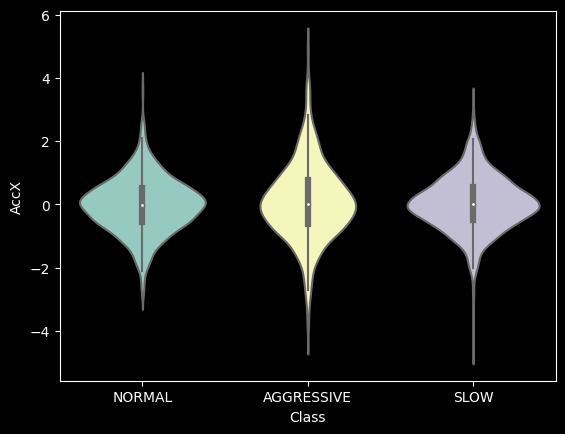

In [20]:
param = {
    'y' : vis.df['AccX'],
    'x' : vis.df['Class']
}
print(vis.distribution(param, graph_type='violin'))

In [ ]:
param = {
    'y' : vis.df['AccY'],
    'x' : vis.df['Class']
}
print(vis.distribution(param, graph_type='violin'))

In [ ]:
param = {
    'y' : vis.df['AccZ'],
    'x' : vis.df['Class']
}
print(vis.distribution(param, graph_type='violin'))

In [ ]:
param = {
    'y' : vis.df['GyroX'],
    'x' : vis.df['Class']
}
print(vis.distribution(param, graph_type='violin'))

In [ ]:
param = {
    'y' : vis.df['GyroY'],
    'x' : vis.df['Class']
}
print(vis.distribution(param, graph_type='violin'))

In [ ]:
param = {
    'y' : vis.df['GyroZ'],
    'x' : vis.df['Class']
}
print(vis.distribution(param, graph_type='violin'))

In [ ]:
param = {
    'x': vis.df['AccX']
}
vis.probplot(param)

In [ ]:
param = {
    'x': vis.df['AccY']
}
vis.probplot(param)

FileNotFoundError: [Errno 2] No such file or directory: '/usr/src/figs//output_probplot_364695.png'

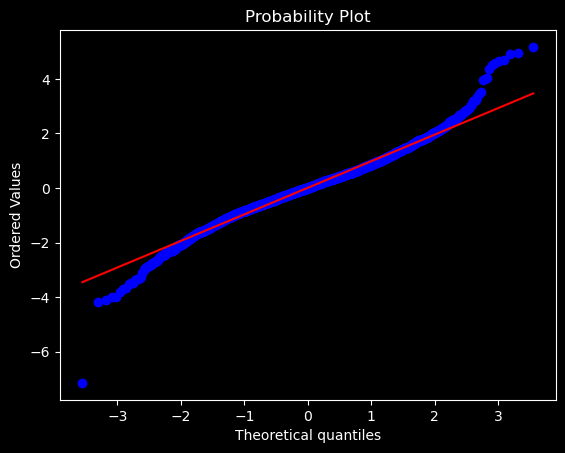

In [21]:
param = {
    'x': vis.df['AccZ']
}
vis.probplot(param)

In [ ]:
param = {
    'x': vis.df['GyroX']
}
vis.probplot(param)

FileNotFoundError: [Errno 2] No such file or directory: '/usr/src/figs//output_probplot_856958.png'

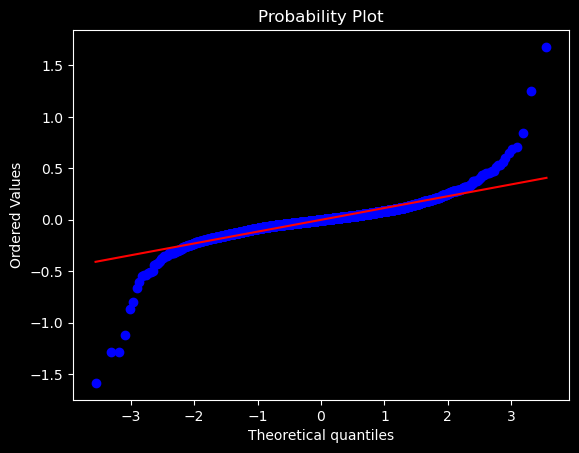

In [22]:
param = {
    'x': vis.df['GyroY']
}
vis.probplot(param)

In [ ]:
param = {
    'x': vis.df['GyroZ']
}
vis.probplot(param)

In [ ]:
param = {
    'y': vis.df['AccX'],
    'x': vis.df['Class']
}
vis.boxplot(param)

In [ ]:
param = {
    'y': vis.df['AccY'],
    'x': vis.df['Class']
}
vis.boxplot(param)

In [ ]:
param = {
    'y': vis.df['AccZ'],
    'x': vis.df['Class']
}
vis.boxplot(param)

In [ ]:
param = {
    'y': vis.df['GyroX'],
    'x': vis.df['Class']
}
vis.boxplot(param)

In [ ]:
param = {
    'y': vis.df['GyroY'],
    'x': vis.df['Class']
}
vis.boxplot(param)

In [ ]:
param = {
    'y': vis.df['GyroZ'],
    'x': vis.df['Class']
}
vis.boxplot(param)

In [ ]:
param = {
    'x': vis.df['AccX'],
}
vis.distribution(param, graph_type='dist')

In [ ]:
param = {
    'x': vis.df['AccY'],
}
vis.distribution(param, graph_type='dist')

In [ ]:
param = {
    'x': vis.df['AccZ'],
}
vis.distribution(param, graph_type='dist')

In [ ]:
param = {
    'x': vis.df['GyroX'],
}
vis.distribution(param, graph_type='dist')

In [ ]:
param = {
    'x': vis.df['GyroY'],
}
vis.distribution(param, graph_type='dist')

In [ ]:
param = {
    'x': vis.df['GyroZ'],
}
vis.distribution(param, graph_type='dist')

In [ ]:
param = {
    'x' : vis.df['Class']
}
print(vis.histogram(param))

In [ ]:
param = {
    'x' : vis.df['AccX']
}
print(vis.histogram(param))

In [ ]:
print(vis.pairplot())

# Outliers detection

In [ ]:
df = pd.read_csv('/usr/src/datasets/driving-behavior/train_motion_data.csv')
df['Class'] = df['Class'].astype('category').cat.codes

In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.1)
model.fit(df)

In [ ]:
scores = model.decision_function(df)

In [ ]:
threshold = np.percentile(scores, 5)

In [ ]:
df['outlier'] = np.where(scores < threshold, 1, 0)

In [ ]:
df

In [ ]:
df.loc[df['outlier'] > 0]